In [95]:
import numpy as np
import geatpy as ea
import time

In [96]:
def aim(Phen):
    x1 = Phen[:, [0]]
    x2 = Phen[:, [1]]
    return np.sin(x1 + x2) + (x1 - x2) ** 2 - 1.5 * x1 + 2.5 * x2 + 1

In [97]:
x1 = [-1.5, 4]
x2 = [-3, 4]
b1 = [1, 1]
b2 = [1, 1]
ranges = np.vstack([x1, x2]).T
borders = np.vstack([b1, b2]).T
varTypes = np.array([0, 0])

In [98]:
Encoding = 'BG'
codes = [1, 1]
precisions = [6, 6]# 10^6
scales = [0, 0]
FieldD = ea.crtfld(Encoding, varTypes, ranges, borders, precisions, codes, scales)

In [99]:
NIND = 20
MAXGEN = 100
maxormins = np.array([1])
selectStyle = 'sus'
recStyle = 'xovdp'
mutStyle = 'mutbin'
Lind = int(np.sum(FieldD[0, :]))
pc = 0.9
pm = 1/Lind
obj_trace = np.zeros((MAXGEN, 2))
var_trace = np.zeros((MAXGEN, Lind))

In [100]:
start_time = time.time()
Chrom = ea.crtpc(Encoding, NIND, FieldD)
variable = ea.bs2ri(Chrom, FieldD)#对初始种群进行解码
ObjV = aim(variable)
best_ind = np.argmin(ObjV)
for gen in range(MAXGEN):
    FitnV = ea.ranking(maxormins * ObjV)
    SelCh = Chrom[ea.selecting(selectStyle,FitnV,NIND-1),:]# 这里减了一个,是为了保留父代精英(ObjV最小的那个个体)
    SelCh = ea.recombin(recStyle, SelCh, pc)
    SelCh = ea.mutate(mutStyle, Encoding, SelCh, pm)
    Chrom = np.vstack([Chrom[best_ind, :], SelCh])
    Phen = ea.bs2ri(Chrom, FieldD)
    ObjV = aim(Phen)
    best_ind = np.argmin(ObjV)
    obj_trace[gen,0]=np.sum(ObjV)/ObjV.shape[0]# 第一列记录当代种群目标函数的均值
    obj_trace[gen,1]=ObjV[best_ind]# 第二列记录最优个体的目标函数值
    var_trace[gen,:]=Chrom[best_ind,:]# 记录当代种群最优个体的染色体

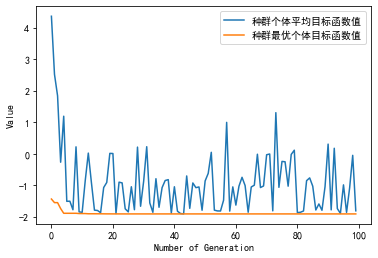

In [101]:
#进化完成
end_time = time.time()
ea.trcplot(obj_trace, [['种群个体平均目标函数值','种群最优个体目标函数值']])#绘制图像

In [102]:
best_gen = np.argmin(obj_trace[:, [1]])
print('最优解的目标函数值：', obj_trace[best_gen, 1])
variable = ea.bs2ri(var_trace[[best_gen], :], FieldD)#解码得到表现型（即对应的决策变量值）
print('最优解的决策变量值为：')
for i in range(variable.shape[1]):
    print('x'+str(i)+'=',variable[0, i])
print('用时：', end_time - start_time,'秒')

最优解的目标函数值： -1.9132229549808448
最优解的决策变量值为：
x0= -0.5471978839871745
x1= -1.5471978839871745
用时： 0.02913689613342285 秒
